# NLP

In [172]:
## Import des librairies 

import pandas as pd 
import numpy as np
import nltk # pour le nlp
import re
import spacy
import gensim
import time
from wordcloud import WordCloud # pour nuage de mots
# from unidecode import unidecode # pour enlever les accents => plus utilisé dans le code ???
from spacy.lang.fr.stop_words import STOP_WORDS # stopwords en francais

# Sklearn

from sklearn.feature_extraction.text import CountVectorizer
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [173]:
# Chargement des données

data = pd.read_csv(r"C:\Users\lesli\Documents\Simplon\Ecouen\Exercices\Machine_learning\Projet_ML\Projet_ML_gr3-master\data\indeed_mongo.csv")
data.head(10)

Unnamed: 0  Unnamed: 0.1                       _id  \
0           0           0.0  5da04bf5559bce5541bcce8f   
1           1           1.0  5da04bf5559bce5541bcce90   
2           2           2.0  5da04bf5559bce5541bcce91   
3           3           3.0  5da04bf5559bce5541bcce92   
4           4           4.0  5da04bf5559bce5541bcce93   
5           5           5.0  5da04bf5559bce5541bcce94   
6           6           6.0  5da04bf5559bce5541bcce95   
7           7           7.0  5da04bf5559bce5541bcce96   
8           8           8.0  5da04bf5559bce5541bcce97   
9           9           9.0  5da04bf5559bce5541bcce98   

                    adresse         date_de_publication  \
0             Toulouse (31)  2019-10-09 11:57:14.429000   
1             Toulouse (31)  2019-10-21 11:57:15.161000   
2               Labège (31)  2019-09-19 19:42:43.947000   
3             Toulouse (31)  2019-09-18 19:42:45.732000   
4             Toulouse (31)  2019-09-16 19:42:47.881000   
5             Toulouse (31)  2019-09-21 11:57:15.765000   
6             Toulouse (31)  2019-09-21 11:57:16.265000   
7             Toulouse (31)  2019-09-16 19:42:52.973000   
8  Issy-les-Moulineaux (92)  2019-10-04 19:42:54.320000   
9                Paris (75)  2019-09-16 19:42:55.936000   

                                         description localisation  \
0  Toulouse (31)VIDAL ASSOCIATES Consulting & Sea...     Toulouse   
1  Toulouse (31)CDIChez notre client grand compte...     Toulouse   
2  Labège (31)CDIStartup de l’IoT Valley labellis...     Toulouse   
3  Toulouse (31)CDIL’equipe SRE est responsable d...     Toulouse   
4  Toulouse (31)30 000 € - 34 000 € par anWiSEED ...     Toulouse   
5  Toulouse (31)VIDAL ASSOCIATES Consulting & Sea...     Toulouse   
6  Toulouse (31)VIDAL ASSOCIATES Consulting & Sea...     Toulouse   
7  Toulouse (31)JFrog est une startup en pleine c...     Toulouse   
8  Issy-les-Moulineaux (92)Stage550 € par moisMis...        Paris   
9  Paris (75)Dans le cadre de notre développement...        Paris   

     nom_entreprise                     salaire  \
0  Vidal Associates                         NaN   
1   MGI Consultants                         NaN   
2           cenareo                         NaN   
3            Sigfox                         NaN   
4            Wiseed  30 000 € - 34 000 € par an   
5  Vidal Associates                         NaN   
6  Vidal Associates                         NaN   
7             JFrog                         NaN   
8        Place2Swap              550 € par mois   
9          Actualys                         NaN   

                                     titre type_de_contrat  \
0         Développeur Sénior Java/ J2E h/f             NaN   
1      Expert performance - infrastructure             CDI   
2                             DevOps / SRE             CDI   
3   Service Reliability Engineer (SRE) F/H             CDI   
4   DEVELOPPEUR(SE) BACKEND JAVA/WEB (H/F)             NaN   
5       Développeur Java / Jee/ Spring f/h             NaN   
6  Développeur Sénior Java EE et/ou Spring             NaN   
7            Ingénieur QA Automation (H/F)             NaN   
8    Stagiaire développeur.e web Fullstack           Stage   
9              Développeur PHP 5 / Symfony             NaN   

                                                 url  
0  https://www.indeed.fr/rc/clk?jk=e3fc82878e0491...  
1  https://www.indeed.fr/rc/clk?jk=9d3a85e0205ca0...  
2  https://www.indeed.fr/rc/clk?jk=cdc48a4dcf7c15...  
3  https://www.indeed.fr/rc/clk?jk=5b7f648563c94f...  
4  https://www.indeed.fr/rc/clk?jk=d625e0f2a0ab61...  
5  https://www.indeed.fr/rc/clk?jk=0eaed1137edb2e...  
6  https://www.indeed.fr/rc/clk?jk=34d5c533cea70c...  
7  https://www.indeed.fr/rc/clk?jk=350e1d69247dfc...  
8  https://www.indeed.fr/rc/clk?jk=5d667e321cb2ee...  
9  https://www.indeed.fr/rc/clk?jk=b91fde21560c96...

In [174]:
# Dimensions du data set

data.shape

(9421, 12)

In [175]:
# Nom des colonnes du data set

data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '_id', 'adresse', 'date_de_publication',
       'description', 'localisation', 'nom_entreprise', 'salaire', 'titre',
       'type_de_contrat', 'url'],
      dtype='object')

In [176]:
# Identification des doublons avec description, localisation (déterminée à partir de l'adresse) et titre

data[data.duplicated(subset=['description', 'localisation', 'titre'], keep='first')].sort_values('description') 

Unnamed: 0  Unnamed: 0.1                       _id         adresse  \
4427        4427        4427.0  5da0baaa16fc49b37529df53  31000 Toulouse   
7877        7877        7877.0  5da352f30ba9bcda4995d4f2  31000 Toulouse   
4029        4029        4029.0  5da08b256aab546bd255c66e  31000 Toulouse   
6854        6854        6854.0  5da32c094e7d8234be9ea417  31000 Toulouse   
4636        4636        4636.0  5da0ce2d5481b9e06f7012d5  31000 Toulouse   
4279        4279        4279.0  5da0a8ed5481b9e06f701264  31000 Toulouse   
7350        7350        7350.0  5da33e420ba9bcda4995cb28  31000 Toulouse   
4294        4294        4294.0  5da0a9a55481b9e06f70126d  31000 Toulouse   
6710        6710        6710.0  5da3280e4e7d8234be9ea08d  31000 Toulouse   
6857        6857        6857.0  5da32c0b4e7d8234be9ea41b  31000 Toulouse   
4296        4296        4296.0  5da0a9e15481b9e06f70126e  31000 Toulouse   
7163        7163        7163.0  5da337c34e7d8234be9eb1d3  31000 Toulouse   
4287        4287        4287.0  5da0a9365481b9e06f701269  31000 Toulouse   
4286        4286        4286.0  5da0a9275481b9e06f701268  31000 Toulouse   
7351        7351        7351.0  5da33e4c0ba9bcda4995cb30  31000 Toulouse   
4281        4281        4281.0  5da0a8fc5481b9e06f701265  31000 Toulouse   
4284        4284        4284.0  5da0a9175481b9e06f701267  31000 Toulouse   
4474        4474        4474.0  5da0be306aab546bd255c6fe  31000 Toulouse   
4625        4625        4625.0  5da0cd9b5481b9e06f7012cf  31000 Toulouse   
6849        6849        6849.0  5da32c024e7d8234be9ea40f  31000 Toulouse   
5053        5053        5053.0  5da1242f5481b9e06f7013ac  31100 Toulouse   
8011        8011        8011.0  5da35c2741a4b4b43bdca71a  31100 Toulouse   
4293        4293        4293.0  5da0a9975481b9e06f70126c  31200 Toulouse   
6780        6780        6780.0  5da32ab54e7d8234be9ea2d8  31200 Toulouse   
4428        4428        4428.0  5da0bab816fc49b37529df54  31200 Toulouse   
6990        6990        6990.0  5da32f8d4e7d8234be9ea81d  31200 Toulouse   
4630        4630        4630.0  5da0cddd5481b9e06f7012d3  31200 Toulouse   
4553        4553        4553.0  5da0c5e75481b9e06f7012af  31200 Toulouse   
7164        7164        7164.0  5da337c84e7d8234be9eb1d8  31200 Toulouse   
6363        6363        6363.0  5da2c8190ba9bcda4995c4db  31500 Toulouse   
...          ...           ...                       ...             ...   
9086        9086           NaN  5dac403786a2889a33206745     Écully (69)   
7415        7415        7415.0  5da33f960ba9bcda4995cc81     Écully (69)   
4382        4382        4382.0  5da0b27316fc49b37529df35     Écully (69)   
3583        3583        3583.0  5da0623f76c49a679068893e   Île-de-France   
7611        7611        7611.0  5da346f60ba9bcda4995d086   Île-de-France   
6474        6474        6474.0  5da2f3f70ba9bcda4995c783   Île-de-France   
5261        5261        5261.0  5da1669016fc49b37529e098   Île-de-France   
7510        7510        7510.0  5da3438fdf3a9a3164dd7e7b   Île-de-France   
7842        7842        7842.0  5da3512341a4b4b43bdca344   Île-de-France   
6433        6433        6433.0  5da2e6100ba9bcda4995c6a7   Île-de-France   
3742        3742        3742.0  5da07acc16fc49b37529de5b   Île-de-France   
6430        6430        6430.0  5da2e54e0ba9bcda4995c69b   Île-de-France   
4740        4740        4740.0  5da0e3c65481b9e06f7012f7   Île-de-France   
6439        6439        6439.0  5da2e8e90ba9bcda4995c6d5   Île-de-France   
4523        4523        4523.0  5da0c1f66aab546bd255c71d   Île-de-France   
4166        4166        4166.0  5da099096aab546bd255c6b3   Île-de-France   
4329        4329        4329.0  5da0ae125481b9e06f701280   Île-de-France   
6731        6731        6731.0  5da328624e7d8234be9ea0df   Île-de-France   
7291        7291        7291.0  5da33cad41a4b4b43bdc97f2   Île-de-France   
5313        5313        5313.0  5da174645481b9e06f701461   Île-de-France   
6792        6792        6792.0  5da32ad94e7d8234be9ea2

In [177]:
# Identification des doublons avec description, adresse, et titre

data[data.duplicated(subset=['description', 'adresse', 'titre'], keep=False)].sort_values('titre')

Unnamed: 0  Unnamed: 0.1                       _id  \
288          288         288.0  5da04bf6559bce5541bccfaf   
3860        3860        3860.0  5da07f935481b9e06f7011e7   
1814        1814        1814.0  5da05a4b559bce5541bcda3a   
2126        2126        2126.0  5da05a4b559bce5541bcdb72   
1949        1949        1949.0  5da05a4b559bce5541bcdac1   
7363        7363        7363.0  5da33e6b0ba9bcda4995cb48   
4700        4700        4700.0  5da0d33d16fc49b37529dfd9   
274          274         274.0  5da04bf6559bce5541bccfa1   
7452        7452        7452.0  5da3405fdf3a9a3164dd7c9c   
17            17          17.0  5da04bf5559bce5541bccea0   
6891        6891        6891.0  5da32c604e7d8234be9ea477   
3616        3616        3616.0  5da0693b76c49a6790688979   
3598        3598        3598.0  5da0676176c49a6790688954   
3584        3584        3584.0  5da062ad76c49a6790688940   
1334        1334        1334.0  5da05a02559bce5541bcd84e   
6910        6910        6910.0  5da32cbb4e7d8234be9ea4e7   
3437        3437        3437.0  5da05a4f559bce5541bce091   
6867        6867        6867.0  5da32c284e7d8234be9ea439   
5274        5274        5274.0  5da1693116fc49b37529e0a4   
5267        5267        5267.0  5da1689c16fc49b37529e09d   
3484        3484        3484.0  5da05a4f559bce5541bce0c0   
7925        7925        7925.0  5da3548b0ba9bcda4995d595   
4082        4082        4082.0  5da08e8e16fc49b37529dec4   
4060        4060        4060.0  5da08ce116fc49b37529debf   
6594        6594        6594.0  5da325d44e7d8234be9e9eb5   
5818        5818        5818.0  5da1ca0616fc49b37529e1c0   
1805        1805        1805.0  5da05a4b559bce5541bcda31   
7300        7300        7300.0  5da33d77df3a9a3164dd79cd   
7722        7722        7722.0  5da349ed0ba9bcda4995d1a2   
5842        5842        5842.0  5da1cb8d16fc49b37529e1cc   
...          ...           ...                       ...   
5883        5883        5883.0  5da1d2695481b9e06f70150d   
7374        7374        7374.0  5da33e9841a4b4b43bdc99d3   
1248        1248        1248.0  5da05a02559bce5541bcd7f8   
209          209         209.0  5da04bf6559bce5541bccf60   
4828        4828        4828.0  5da0f4bb16fc49b37529e01d   
707          707         707.0  5da05a01559bce5541bcd5db   
4245        4245        4245.0  5da0a7286aab546bd255c6c9   
5543        5543        5543.0  5da1b84d5481b9e06f7014a1   
3568        3568        3568.0  5da05a4f559bce5541bce114   
5745        5745        5745.0  5da1c4365481b9e06f7014b2   
6666        6666        6666.0  5da3270a4e7d8234be9e9fa7   
853          853         853.0  5da05a01559bce5541bcd66d   
3358        3358        3358.0  5da05a4e559bce5541bce042   
4337        4337        4337.0  5da0aedd5481b9e06f701288   
4897        4897        4897.0  5da1050716fc49b37529e052   
1295        1295        1295.0  5da05a02559bce5541bcd827   
7024        7024        7024.0  5da330564e7d8234be9ea90e   
2051        2051        2051.0  5da05a4b559bce5541bcdb27   
1168        1168        1168.0  5da05a02559bce5541bcd7a8   
7403        7403        7403.0  5da33f430ba9bcda4995cc34   
4705        4705        4705.0  5da0d50616fc49b37529dfdc   
5099        5099        5099.0  5da1341916fc49b37529e07b   
2713        2713        2713.0  5da05a4d559bce5541bcddbd   
3684        3684        3684.0  5da0779816fc49b37529de45   
6691        6691        6691.0  5da327954e7d8234be9ea025   
6672        6672        6672.0  5da327294e7d8234be9e9fbe   
2944        2944        2944.0  5da05a4d559bce5541bcdea4   
3825        3825        3825.0  5da07e1716fc49b37529de6b   
1448        1448        1448.0  5da05a02559bce5541bcd8c1   
3827        3827        3827.0  5da07e2816fc49b37529de6c   

                       adresse         date_de_publication  \
288                 Paris (75)  2019-09-25 19:51:43.028000   
3860                Paris (75)  2019-09-25 21:00:05.918000   
1814             Paris 2e (75)  2019-10-04 20:57:08.986000   
2126             Paris 2e (75)  2019-

In [178]:
# Suppression des doublons avec la création d'une nouvelle variable data2

data2 = data[~data.duplicated(subset=['description', 'adresse', 'titre'], keep='first')]
data2.shape

# Alternative
# data.drop_duplicates(subset=['description', 'localisation', 'titre']).shape

(8015, 12)

## Titres annonces

In [179]:
# Comptabiliser le nb de Na dans titre

data2['titre'].isna().sum()

0

In [180]:
# Nombre de titres uniques dans la colonne "titre" du dataset 

data2['titre'].nunique()

# sur un total de 8140

6623

In [181]:
# Comptabiliser le nb de titres en doublon

data2['titre'].count() - data['titre'].nunique()

1392

In [182]:
# Création d'une nouvelle variable ne contenant que les titres des annonces 

titre = data2.titre.tolist()

In [183]:
# Visualisation des premières occurrences de la variable "titre"

titre[:5]

['Développeur Sénior Java/ J2E h/f',
 'Expert performance - infrastructure',
 'DevOps / SRE',
 'Service Reliability Engineer (SRE) F/H',
 'DEVELOPPEUR(SE) BACKEND JAVA/WEB (H/F)']

In [185]:
# Type de la variable titre

print(type(titre))

<class 'list'>


#### Tokenisation

In [186]:
# Liste de mots: enlever les ponctuations et les caractères spéciaux
def token(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True enlèvement ponctuation

In [187]:
%%time

titre_splt = list(token(titre))
print(titre_splt)

[['developpeur', 'senior', 'java'], ['expert', 'performance', 'infrastructure'], ['devops', 'sre'], ['service', 'reliability', 'engineer', 'sre'], ['developpeur', 'se', 'backend', 'java', 'web'], ['developpeur', 'java', 'jee', 'spring'], ['developpeur', 'senior', 'java', 'ee', 'et', 'ou', 'spring'], ['ingenieur', 'qa', 'automation'], ['stagiaire', 'developpeur', 'web', 'fullstack'], ['developpeur', 'php', 'symfony'], ['developpeur', 'backends', 'cloud'], ['developpeur', 'full', 'stack'], ['developpeur', 'full', 'stack', 'en', 'tele', 'travail'], ['engie', 'digital', 'site', 'reliability', 'engineer'], ['apprentissage', 'nokiaedu', 'cloud', 'lab', 'developpeur'], ['developpeur', 'alm', 'liquidity'], ['cloud', 'engineer'], ['administrateur', 'systeme', 'linux'], ['stage', 'developpeur', 'ui'], ['developpeur', 'developpeuse', 'php'], ['developpeur', 'android', 'java', 'billettique', 'sans', 'contact'], ['developpeur', 'javascript', 'fullstack'], ['developpeur', 'sql'], ['developpeur', 'eu


Wall time: 361 ms


Nettoyage de la variable titre_splt: suppression des stopwords

In [188]:
print(STOP_WORDS)

{'envers', 'différent', 'sont', 'ta', 'vous', 'na', 'auxquelles', 'partant', 'paf', 'autrui', 'naturel', 'oust', 'une', 'vous-mêmes', 'ollé', 'tout', 'directement', 'parce', 'seize', 'suis', 'ore', 'derniere', 'hi', 'sera', 'miennes', 'vivat', 'depuis', 'afin', 'sauf', 'celle', 'cet', 'deja', 'moi-même', 'ou', 'non', 'particulier', 'ouvert', 'cinquième', 'puisque', 'combien', 'quelques', 'mille', 'mais', 'soi', 'subtiles', 'avais', 'lors', 'olé', 'chiche', 'moindres', 'quel', 'toi', 'directe', 'différentes', 'là', 'votre', 'première', 'pres', 'contre', 'celle-là', 'par', 'chez', 'nouveau', 'quelconque', 'extenso', 'lui-meme', 'moi-meme', 'ci', 'bravo', 'toi-même', 'seront', 't’', 'certes', 'anterieures', 'nôtres', 'avant', 'crac', 'ses', 'cependant', 'uniques', 'specifiques', 'd’', 'dit', 'te', 'tac', 'étaient', 'en', 'dixième', 'ouverte', 'est', 'vingt', 'telles', 'tiennes', 'parler', 'houp', 'quels', 'oh', 'chers', 'dix', 'sur', 'peut', 'ça', 'a', 'auxquels', 'peu', 'tels', 'durant',

In [189]:
# Nb de stopwords français contenus

len(STOP_WORDS) 

610

In [190]:
# Mise à jour de la liste de stopwords issue de spacy avec des mots non pertinents repérés dans le data set

STOP_WORDS.update('se', 'euse', 'trice', 'on', 'for', 'in', 'de', 'mois')

Comparaison entre STOP_WORDS et key words (scraping)

In [195]:
# Détermination de la variable key_words (mots-clés utilisés dans le pre-processing)

key_words = ['abcl', 'ada', 'afnix', 'agora', 'alf', 'algol', 'apl', 'applescript', 'asp.net',
                 'autoit', 'awk', 'back end', 'bash', 'basic', 'beanshell', 'beta' ,'bliss', 'c',
                 'c#', 'c++', 'cecil', 'charity', 'chuck', 'cilk' ,'clean' ,'cleo', 'clist',
                 'cobol', 'cobra' ,'coldfusion', 'component pascal' ,'concurrent pascal', 'css',
                 'curl', 'curry' ,'d' ,'dasl' ,'dibol', 'e', 'eiffel' ,'erlang' ,'excel', 'f#',
                 'f-script', 'forth', 'fortran' ,'fril', 'frink', 'front end',
                 'game maker language', 'haskell' ,'html' ,'hypertalk' ,'ici' ,'io', 'j' ,'jass',
                 'java', 'javascript', 'joule' ,'jovial' ,'joy' ,'kite' ,'kotlin' ,'lava', 'leda',
                 'limbo', 'linux', 'lisaac', 'lisp', 'lua', 'm' ,'mariadb', 'matlab',
                 'maya embedded language', 'ml' ,'modula-2', 'mondrian', 'mongodb', 'moo',
                 'moto', 'mysql' ,'nemerle', 'nosql' ,'oberon' ,'object-z' ,'objective-c',
                 'obliq' ,'occam' ,'opal' ,'ops5' ,'oxygene' ,'oz' ,'pascal' ,'pcastl' ,'perl',
                 'php', 'pict', 'plc' ,'pli' ,'pliant' ,'poplog' ,'postscript', 'powershell',
                 'prograph', 'prolog', 'python', 'q', 'r', 'rapira', 'rebol' ,'revolution' ,'rexx',
                 'roop', 'rpg', 'ruby' ,'s-lang', 'salsa' ,'sas' ,'scala' ,'self' ,'sgml' ,'shell',
                 'slate', 'small', 'smalltalk' ,'soap' ,'spin' ,'sql' ,'sr' ,'swift', 'tcl',
                 'turing', 'vb.net', 'vba', 'vbscript', 'visual basic' ,'visual foxpro',
                 'windows powershell', 'xhtml' ,'xl' ,'xml', 'xotcl', 'tableau', 'powerbi','symfony',
                 'jquery','angular','react','react native','node js','git','github','visual studio',
                 'django','flask','api rest','laravel', 'hololens', 'docker', 'jira', 'scrum', 'kanban', 
                 'azure','aws', 'teamcity', 'jenkins', 'cisco','intel','android','ios','unity', 
                 'unreal engine', 'ux designer','realite virtuelle','realite augmentee','game','ihm',
                 'vr','ar','3d','electronic','iot']

In [196]:
STOP_WORDS = [ele for ele in STOP_WORDS if ele != key_words]

In [197]:
len(STOP_WORDS)

610

In [206]:
%%time
for ele in STOP_WORDS:    
    [titre_splt[i].remove(ele) for i in range(len(titre_splt)) if ele in titre_splt[i]]
titre_splt

Wall time: 1 s


[['developpeur', 'senior', 'java'],
 ['expert', 'performance', 'infrastructure'],
 ['devops', 'sre'],
 ['service', 'reliability', 'engineer', 'sre'],
 ['developpeur', 'backend', 'java', 'web'],
 ['developpeur', 'java', 'jee', 'spring'],
 ['developpeur', 'senior', 'java', 'ee', 'spring'],
 ['ingenieur', 'qa', 'automation'],
 ['stagiaire', 'developpeur', 'web', 'fullstack'],
 ['developpeur', 'php', 'symfony'],
 ['developpeur', 'backends', 'cloud'],
 ['developpeur', 'full', 'stack'],
 ['developpeur', 'full', 'stack', 'tele', 'travail'],
 ['engie', 'digital', 'site', 'reliability', 'engineer'],
 ['apprentissage', 'nokiaedu', 'cloud', 'lab', 'developpeur'],
 ['developpeur', 'alm', 'liquidity'],
 ['cloud', 'engineer'],
 ['administrateur', 'systeme', 'linux'],
 ['stage', 'developpeur', 'ui'],
 ['developpeur', 'developpeuse', 'php'],
 ['developpeur', 'android', 'java', 'billettique', 'contact'],
 ['developpeur', 'javascript', 'fullstack'],
 ['developpeur', 'sql'],
 ['developpeur', 'euse', 'big

In [207]:
titre_cl = [ele for ele in titre_splt if ele != STOP_WORDS]

In [200]:
from gensim.models import Word2Vec

In [208]:
# fonctionnement de Word2Vec

help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
 |  
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can a

In [209]:
model=Word2Vec(titre_cl)

En utilisant la fonction model.wv.most_similar_cosmul, regarder les mots les plus proches d'un mot sélectionné

In [213]:
model.wv.most_similar_cosmul(['developpeur'],)

[('junior', 0.9994596242904663),
 ('freelance', 0.9994322061538696),
 ('react', 0.9994298815727234),
 ('javascript', 0.9994297027587891),
 ('angular', 0.9994127750396729),
 ('web', 0.9994058012962341),
 ('backend', 0.9993997812271118),
 ('experimente', 0.999384343624115),
 ('lead', 0.9993723630905151),
 ('euse', 0.999371349811554)]

/!\ pb avec le mot 'euse' qui est censé être dans les STOP_WORDS et donc ne doit pas se retrouver ici :/

In [214]:
model.wv.most_similar_cosmul(['dev'],)

[('secteur', 0.9998284578323364),
 ('cloud', 0.9998277425765991),
 ('saas', 0.9998208284378052),
 ('systeme', 0.9998204708099365),
 ('plateforme', 0.9998172521591187),
 ('leader', 0.9998103380203247),
 ('donnees', 0.9998061060905457),
 ('support', 0.9998009204864502),
 ('directeur', 0.9997978210449219),
 ('projets', 0.9997965693473816)]

In [215]:
model.wv.most_similar_cosmul(['developpement'],)

[('charge', 0.9997929334640503),
 ('test', 0.999792754650116),
 ('cloud', 0.9997828006744385),
 ('ingenieur', 0.9997696876525879),
 ('secteur', 0.999767005443573),
 ('commercial', 0.9997601509094238),
 ('donnees', 0.9997587203979492),
 ('projets', 0.9997533559799194),
 ('responsable', 0.9997521638870239),
 ('architecte', 0.9997477531433105)]

In [216]:
model.wv.most_similar_cosmul(['data'],)

[('bi', 0.9994430541992188),
 ('consultant', 0.9994162321090698),
 ('internship', 0.999411940574646),
 ('validation', 0.9994099736213684),
 ('manager', 0.9993674755096436),
 ('digital', 0.9993656873703003),
 ('projets', 0.9993618726730347),
 ('stage', 0.9993612766265869),
 ('marketing', 0.9993606805801392),
 ('technique', 0.9993597269058228)]

In [217]:
model.wv.most_similar_cosmul(['web'],)

[('fullstack', 0.9997175931930542),
 ('concepteur', 0.9997010827064514),
 ('freelance', 0.9997002482414246),
 ('angular', 0.9996921420097351),
 ('lead', 0.9996816515922546),
 ('paris', 0.9996769428253174),
 ('javascript', 0.9996740818023682),
 ('senior', 0.9996557831764221),
 ('cobol', 0.9996504783630371),
 ('analyste', 0.9996466636657715)]

In [218]:
model.wv.most_similar_cosmul(['scientist'],)

[('analyst', 0.9996392130851746),
 ('big', 0.9996379017829895),
 ('engineer', 0.9994533061981201),
 ('learning', 0.9993808269500732),
 ('charge', 0.9993321895599365),
 ('consultant', 0.999327540397644),
 ('manager', 0.9993270039558411),
 ('paris', 0.9992991089820862),
 ('machine', 0.999296247959137),
 ('decisionnel', 0.9992913007736206)]

In [219]:
model.wv.most_similar_cosmul(['python'],)

[('cloud', 0.9998012781143188),
 ('freelance', 0.999799907207489),
 ('applications', 0.9997803568840027),
 ('donnees', 0.9997791051864624),
 ('analyste', 0.9997782111167908),
 ('expert', 0.9997766017913818),
 ('secteur', 0.9997727870941162),
 ('paris', 0.999767541885376),
 ('iot', 0.9997649192810059),
 ('ia', 0.999763011932373)]

In [220]:
model.wv.most_similar_cosmul(['stagiaire'],)

[('paris', 0.9998395442962646),
 ('leader', 0.9998193979263306),
 ('manager', 0.9998177289962769),
 ('responsable', 0.9998157024383545),
 ('secteur', 0.9998140335083008),
 ('commercial', 0.9998138546943665),
 ('cloud', 0.9998100996017456),
 ('cobol', 0.999808669090271),
 ('sante', 0.9998068809509277),
 ('energie', 0.999805212020874)]

Il n'est pas possible d'utiliser la variable titre_lemma car les mots ne sont pas trouvés dans le vocabulaire.

#### Lemmatisation
Obtenir la racine des mots
https://fr.wikipedia.org/wiki/Lemmatisation

In [221]:
# Définition d'une fonction pour obtenir la racine des mots (lemmatisation)

def lemma(sentences, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): 
    result = []
    for sent in sentences:
        doc = nlp(" ".join(sent)) 
        result.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return result

nlp = spacy.load('fr_core_news_sm', disable=['parser', 'ner']) 
# Installer spacy 'fr' model 
# Run terminal: python -m spacy download fr 
# explications:https://spacy.io/usage/processing-pipelines

In [222]:
# Visualisation des premiers éléments de titre_splt pour comparer avec les sorties de titre_lemma et titre_lemma1

titre_cl[:5]

[['developpeur', 'senior', 'java'],
 ['expert', 'performance', 'infrastructure'],
 ['devops', 'sre'],
 ['service', 'reliability', 'engineer', 'sre'],
 ['developpeur', 'backend', 'java', 'web']]

In [223]:
%%time
# Création de la variable titre_lemma (nom, verbe, adjectif)
# Visualisation des 5 premières occurrences 

titre_lemma = lemma(titre_splt, allowed_postags=['NOUN', 'VERB', 'ADJ']) 
print(titre_lemma[:5])

['developpeur java', 'expert performance infrastructur', 'devop sr', 'service engineer sre', 'developpeur']
Wall time: 27.7 s


In [224]:
%%time
# Création de la variable titre_lemma (nom, verbe)
# Visualisation des 5 premières occurrences 

titre_lemma1 = lemma(titre_splt, allowed_postags=['NOUN', 'VERB']) 
print(titre_lemma1[:5])

['developpeur java', 'performance', 'devop', 'service sre', 'developpeur']
Wall time: 21.7 s


Je pense qu'il faudra choisir une des 2 options de lemmatisation: nom, verbe et adjectif ou nom, verbe. 

Cf. résultat au-dessus. 

#### Création d'une matrice document-mot
Utilisation de CountVectorizer (mots dont l'occurrence est au moins égale à 10)

Suppression des stopwords français => STOP_WORDS (spacy)

In [80]:
print(type(STOP_WORDS))

<class 'list'>


In [81]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
cv_titre = CountVectorizer(analyzer = 'word', 
                           stop_words = list(STOP_WORDS), 
                           ngram_range=(1,2),
                           token_pattern='[a-zA-Z0-9]{3,}',
                           min_df = 3
                          )
cv_titre.fit(titre_lemma1)
titre_cv = cv_titre.transform(titre_lemma1)
titre_cv.shape

C:\Users\lesli\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['all', 'anmoins', 'apr', 'cinquanti', 'cinqui', 'del', 'derri', 'deuxi', 'diff', 'dixi', 'douzi', 'except', 'hol', 'huiti', 'malgr', 'mement', 'neuvi', 'oll', 'onzi', 'particuli', 'pass', 'plut', 'premi', 'quatri', 'quelqu', 'rement', 'rent', 'rente', 'rentes', 'rents', 'res', 'revoil', 'septi', 'sixi', 'sormais', 'taient', 'tais', 'tait', 'tre', 'troisi', 'voil'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(8015, 693)

In [226]:
print(titre_cv.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [227]:
cv_titre.vocabulary_

{'developpeur': 161,
 'java': 432,
 'developpeur java': 221,
 'performance': 517,
 'devop': 288,
 'service': 592,
 'sre': 613,
 'spring': 608,
 'developpeur spring': 270,
 'ingenieur': 391,
 'automation': 59,
 'cloud': 94,
 'developpeur cloud': 179,
 'travail': 674,
 'site': 597,
 'apprentissage': 41,
 'engineer': 322,
 'administrateur': 3,
 'stage': 614,
 'fullstack': 370,
 'developpeur fullstack': 210,
 'big': 72,
 'developpeur big': 175,
 'javascript': 434,
 'developpeur javascript': 223,
 'scaler': 577,
 'developpeur scaler': 261,
 'energie': 320,
 'stage energie': 627,
 'full': 365,
 'nante': 485,
 'developpeur full': 209,
 'bigdata': 73,
 'angular': 25,
 'developpeur angular': 167,
 'systeme': 650,
 'administrateur systeme': 5,
 'frontend': 364,
 'developpeur frontend': 208,
 'senior': 588,
 'end': 314,
 'developpeur senior': 263,
 'validation': 679,
 'ingenieur validation': 417,
 'node': 489,
 'appetence': 35,
 'developpeur node': 238,
 'finance': 346,
 'software': 600,
 'test':

In [228]:
cv_titre.get_feature_names()

['accepte',
 'acces',
 'acheteur',
 'administrateur',
 'administrateur reseau',
 'administrateur systeme',
 'affaire',
 'affaire gestion',
 'agence',
 'agent',
 'aide',
 'air',
 'alit',
 'alizent',
 'alternance',
 'alternance developpeur',
 'alternance ingenieur',
 'alternance stage',
 'alterner',
 'amelioration',
 'analyst',
 'analyste',
 'analyste developpeur',
 'android',
 'android freelance',
 'angular',
 'angular confirme',
 'angular freelance',
 'angular node',
 'angular react',
 'angular stage',
 'angularjs',
 'animateur',
 'animation',
 'api',
 'appetence',
 'application',
 'application hybride',
 'apprenti',
 'apprenti developpeur',
 'apprenticeship',
 'apprentissage',
 'architecte',
 'architecte cloud',
 'architecte java',
 'architecture',
 'artisan',
 'asp',
 'assistance',
 'assister',
 'assister application',
 'assister chef',
 'assister developpeur',
 'assister direction',
 'associate',
 'atelier',
 'atelier production',
 'augmentee',
 'automaticien',
 'automation',
 'auto

In [229]:
print(type(titre_cv))

<class 'scipy.sparse.csr.csr_matrix'>


In [230]:
# Somme du nb d'occurrences pour chaque mot

w_titre = np.sum(titre_cv, axis = 0)

In [231]:
# Calcul de la fréquence de chaque mot dans w_titre

w_titre_freq = [(word, w_titre[0,idx]) for word, idx in cv_titre.vocabulary_.items()]
w_titre_freq = sorted(w_titre_freq, key = lambda x: x[1], reverse= True)
print(w_titre_freq)

[('developpeur', 5113), ('stage', 528), ('ingenieur', 462), ('end', 380), ('freelance', 344), ('front', 263), ('developpeur front', 224), ('consulter', 218), ('angular', 217), ('front end', 181), ('developpeur angular', 171), ('developpeur end', 169), ('projet', 152), ('intelligence', 139), ('concepteur', 135), ('chef', 133), ('confirme', 131), ('full', 125), ('ingenieur developpeur', 124), ('chef projet', 122), ('developpeur freelance', 118), ('etude', 104), ('javascript', 102), ('devop', 101), ('stage developpeur', 100), ('node', 98), ('developpeur full', 95), ('developpeur confirme', 89), ('application', 89), ('designer', 87), ('embarque', 85), ('alternance', 85), ('charge', 79), ('concepteur developpeur', 73), ('manager', 73), ('assister', 71), ('developpeur node', 69), ('master', 67), ('java', 65), ('react', 65), ('developpeur embarque', 65), ('junior', 63), ('python', 63), ('developpeur javascript', 62), ('analyste', 57), ('senior', 56), ('editeur', 54), ('backend', 54), ('develo

Nuage de mots

In [232]:
titre_txt = data.titre.tolist()

In [233]:
titre_txt

['Développeur Sénior Java/ J2E h/f',
 'Expert performance - infrastructure',
 'DevOps / SRE',
 'Service Reliability Engineer (SRE) F/H',
 'DEVELOPPEUR(SE) BACKEND JAVA/WEB (H/F)',
 'Développeur Java / Jee/ Spring f/h',
 'Développeur Sénior Java EE et/ou Spring',
 'Ingénieur QA Automation (H/F)',
 'Stagiaire développeur.e web Fullstack',
 'Développeur PHP 5 / Symfony',
 'Développeur Backends : Cloud (H/F)',
 'Développeur Full-stack',
 'Développeur Full Stack en télé-travail',
 'ENGIE Digital - Site Reliability Engineer H/F',
 'Apprentissage - NokiaEdu Cloud Lab développeur H/F',
 'Développeur – ALM & Liquidity (H/F)',
 'Cloud Engineer H/F',
 'Administrateur Système Linux F/H',
 'Stage - Développeur UI H/F',
 'Développeur/ Développeuse PHP7 ️ (H/F)',
 'Développeur ANDROID/JAVA – Billettique sans contact (F/H)',
 'Développeur Javascript Fullstack H/F',
 'Développeur SQL (H/F)',
 'Développeur(euse) Big Data (H/F)',
 'Développeur (e) Java/JavaScript Datavisualization Nantes',
 'Développeur 

In [235]:
titre_txt = " ".join(word.lower() for word in data.titre if word != STOP_WORDS)

In [236]:
print(type(titre_txt))

<class 'str'>


In [237]:
titre_txt

'développeur sénior java/ j2e h/f expert performance - infrastructure devops / sre service reliability engineer (sre) f/h developpeur(se) backend java/web (h/f) développeur java / jee/ spring f/h développeur sénior java ee et/ou spring ingénieur qa automation (h/f) stagiaire développeur.e web fullstack développeur php 5 / symfony développeur backends : cloud (h/f) développeur full-stack développeur full stack en télé-travail engie digital - site reliability engineer h/f apprentissage - nokiaedu cloud lab développeur h/f développeur – alm & liquidity (h/f) cloud engineer h/f administrateur système linux f/h stage - développeur ui h/f développeur/ développeuse php7 ️ (h/f) développeur android/java – billettique sans contact (f/h) développeur javascript fullstack h/f développeur sql (h/f) développeur(euse) big data (h/f) développeur (e) java/javascript datavisualization nantes développeur big data / hadoop h/f développeur java / scala h/f développeur/se java / scala f/h développeur dévelo

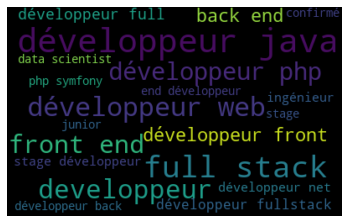

In [241]:
# Nuage de mots 

# possibilité de retrancher directement du nuage de mots des stopwords 

# stpw = ['']
# stopwords=stpw

# WordCloud(font_path=None, width=400, height=200, margin=2, 
#           ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, 
#           color_func=None, max_words=200, min_font_size=4, stopwords=None, 
#           random_state=None, background_color='black', max_font_size=None, 
#           font_step=1, mode='RGB', relative_scaling='auto', regexp=None, 
#           collocations=True, colormap=None, normalize_plurals=True, contour_width=0, 
#           contour_color='black', repeat=False)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=400, 
                      height=250,
                      max_words = 20, 
                      max_font_size=200,
                      min_font_size = 4,
                      background_color = 'black', 
                      stopwords = STOP_WORDS).generate(titre_txt)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Descriptions des annonces

In [242]:
# Comptabiliser le nb de Na dans description

data['description'].isna().sum()

0

In [243]:
# Nombre de description uniques dans la colonne "description" du data set 

data['description'].nunique()

# sur un total de 8140

8011

In [244]:
# Comptabiliser le nb de descriptions en doublon

data['description'].count() - data['description'].nunique()

1410

In [245]:
# Création d'une nouvelle variable ne contenant que les descriptions des annonces 

desc = data2.description.tolist()

In [246]:
# Visualisation des premières occurrences de la variable "desc"

desc[:5]

["Toulouse (31)VIDAL ASSOCIATES Consulting & Search, référence dans le recrutement de cadres spécialistes et de dirigeants en France et à l'international, recrute pour son client en CDI un Développeur Sénior Java/J2E h/f basé à Toulouse, 31.\r\n\r\nVous souhaitez booster votre carrière et votre rémunération ?\r\nVous souhaitez rejoindre un client final sans renoncer à travailler sur une variété de missions et à développer vos compétences techniques ?\r\nVous avez envie de partager votre passion pour les nouvelles technologies dans une ambiance « 2.0 » ?\r\n\r\n« 100% made in Toulouse », notre client est un éditeur de logiciel particulièrement innovant.\r\nEntreprise à taille humaine (250 collaborateurs), ils sont LES leaders sur leur segment de marché en France (70% de part de marché) et sont également présent à l'international sur plusieurs continents.\r\nLeur communauté de développeurs n'a de cesse de s'enrichir de nouvelles personnalités, rejoignez-les!\r\n\r\nDéveloppeur Java / Jee

In [247]:
# Type de la variable desc

print(type(desc))

<class 'list'>


In [248]:
# Suppression des adresses e-mails, sauts de ligne et apostrophes

desc = [re.sub(r"\S*@\S*\s?|\s+|\'",' ', sent) for sent in desc]

desc[1]

'Toulouse (31)CDIChez notre client grand compte, basé à Toulouse, vous intervenez sur la réalisation et la coordination des campagnes de qualification des applications. Vous intervenez avant la mise en production des applications. En qualité de référent qualification logicielle / expert technique, vous assurez une bonne communication avec les développeurs pour valider avec eux les points essentiels permettant de valider le passage en production de l’application. Vous intégrez une équipe déjà constituée d’experts performance d’une dizaine de personnes. Principales tâches à mener au cours de la mission : Recueil des besoins – définition des spécificationsDéroulement des tests de charge et de robustesseEchange avec les responsables métiersProposition d’actions en fonction des résultats obtenus : réalisation ou préconisation selon contexteDocumentationReportingVeille technologique Environnement technique : Windows et Unix Langages : Java, script Bash, C… Outils : Jmeter Méthode Agile Votre

#### Tokenisation

In [249]:
%%time
desc_splt = list(token(desc))
print(desc_splt[:1])

# Attention, ne pas afficher tous les éléments de "desc_splt" car trop d'élément et risque de crash

[['toulouse', 'vidal', 'associates', 'consulting', 'search', 'reference', 'dans', 'le', 'recrutement', 'de', 'cadres', 'specialistes', 'et', 'de', 'dirigeants', 'en', 'france', 'et', 'international', 'recrute', 'pour', 'son', 'client', 'en', 'cdi', 'un', 'developpeur', 'senior', 'java', 'base', 'toulouse', 'vous', 'souhaitez', 'booster', 'votre', 'carriere', 'et', 'votre', 'remuneration', 'vous', 'souhaitez', 'rejoindre', 'un', 'client', 'final', 'sans', 'renoncer', 'travailler', 'sur', 'une', 'variete', 'de', 'missions', 'et', 'developper', 'vos', 'competences', 'techniques', 'vous', 'avez', 'envie', 'de', 'partager', 'votre', 'passion', 'pour', 'les', 'nouvelles', 'technologies', 'dans', 'une', 'ambiance', 'made', 'in', 'toulouse', 'notre', 'client', 'est', 'un', 'editeur', 'de', 'logiciel', 'innovant', 'entreprise', 'taille', 'humaine', 'collaborateurs', 'ils', 'sont', 'les', 'leaders', 'sur', 'leur', 'segment', 'de', 'marche', 'en', 'france', 'de', 'part', 'de', 'marche', 'et', 'so

#### Lemmatisation 

In [252]:
%%time
# Création de la variable titre_lemma (nom, verbe, adjectif)
# Visualisation de la première occurrence

desc_lemma = lemma(desc_splt, allowed_postags=['NOUN', 'VERB', 'ADJ']) 
print(desc_lemma[:1])

['toulouse search reference recrutement cadre specialiste dirigeant international recrut client cdi developpeur senior java base toulous souhaiter booster carriere remuneration rejoindre client final renoncer travailler variete mission developper competence technique envier partager passion nouveau technologier ambiance mad toulous client editeur entreprendre taille humain collaborateur leader segment marche part marche international continent communaute developpeur cesse enrichir nouveau personnalite rejoignez developpeur spring base min toulouse client final editeur logiciel autre poste master developer chef projet mission sein communaute developpeur changer regulierement nouveau fonctionnalite offre brique maintien evolution configuration tache maintenance evolutiv stack technique backend spring batch apache camel scheduler bashbase donnee mysql cs agile devop amelioration jenkin nexu selenium ansibl liste exhaustif profil posseder diplome informatique type ecole ingenieur enseiith 

In [253]:
%%time
# Création de la variable titre_lemma (nom, verbe)
# Visualisation de la première occurrence 

desc_lemma1 = lemma(desc_splt, allowed_postags=['NOUN', 'VERB']) 
print(desc_lemma[:1])

['toulouse search reference recrutement cadre specialiste dirigeant international recrut client cdi developpeur senior java base toulous souhaiter booster carriere remuneration rejoindre client final renoncer travailler variete mission developper competence technique envier partager passion nouveau technologier ambiance mad toulous client editeur entreprendre taille humain collaborateur leader segment marche part marche international continent communaute developpeur cesse enrichir nouveau personnalite rejoignez developpeur spring base min toulouse client final editeur logiciel autre poste master developer chef projet mission sein communaute developpeur changer regulierement nouveau fonctionnalite offre brique maintien evolution configuration tache maintenance evolutiv stack technique backend spring batch apache camel scheduler bashbase donnee mysql cs agile devop amelioration jenkin nexu selenium ansibl liste exhaustif profil posseder diplome informatique type ecole ingenieur enseiith 

In [258]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
cv_desc = CountVectorizer(analyzer = 'word', 
                           stop_words = list(STOP_WORDS), 
                           ngram_range=(1,2),
                           token_pattern='[a-zA-Z0-9]{3,}',
                           min_df = 3
                          )
cv_desc.fit(desc_lemma)
desc_cv = cv_desc.transform(desc_lemma)
desc_cv.shape

Wall time: 19.4 s


(8015, 96817)

In [259]:
cv_desc.vocabulary_

{'toulouse': 91379,
 'search': 81099,
 'reference': 76162,
 'recrutement': 75741,
 'cadre': 11537,
 'specialiste': 85097,
 'dirigeant': 27842,
 'international': 48987,
 'recrut': 75701,
 'client': 14360,
 'cdi': 12551,
 'developpeur': 26373,
 'senior': 81663,
 'java': 50034,
 'base': 9654,
 'toulous': 91319,
 'souhaiter': 84627,
 'booster': 10800,
 'carriere': 12337,
 'remuneration': 77218,
 'rejoindre': 76658,
 'final': 39225,
 'renoncer': 77417,
 'travailler': 92406,
 'variete': 94933,
 'mission': 56627,
 'developper': 26137,
 'competence': 17247,
 'technique': 88456,
 'envier': 33053,
 'partager': 63556,
 'passion': 64476,
 'technologier': 89752,
 'ambiance': 3523,
 'mad': 53214,
 'editeur': 30449,
 'entreprendre': 32325,
 'taille': 88083,
 'humain': 44510,
 'collaborateur': 15795,
 'leader': 51573,
 'segment': 81494,
 'marche': 54319,
 'part': 63430,
 'continent': 20790,
 'communaute': 16908,
 'cesse': 13173,
 'enrichir': 31899,
 'personnalite': 65748,
 'rejoignez': 76644,
 'spring

In [260]:
cv_desc.get_feature_names()

['aaer',
 'aaer permettre',
 'abap',
 'abilitie',
 'ability',
 'ability independently',
 'ability interact',
 'abinitio',
 'abl',
 'abl demonstrate',
 'abl large',
 'abond',
 'abond jour',
 'abondement',
 'abondement employeur',
 'abondemer',
 'abondemer condition',
 'abonlin',
 'abonlin ambition',
 'abonlin solution',
 'abonn',
 'abonn creee',
 'abonn telephoniqu',
 'abonne',
 'abonne adherent',
 'abonne description',
 'abonne pratique',
 'abonnement',
 'abonnement annuel',
 'abonnement transport',
 'abonnement visibler',
 'abonnements',
 'abonnements annee',
 'abonnemer',
 'abonnemer bon',
 'abonnemer club',
 'abonnemer parcours',
 'abonner',
 'abordable',
 'abordable initie',
 'abordable plat',
 'abordage',
 'abordage geant',
 'aborde',
 'abordee',
 'abordee tourner',
 'aborder',
 'aborder aspect',
 'aborder challenge',
 'aborder mission',
 'aborder problematique',
 'aborder probleme',
 'aborder sujet',
 'aborder thematique',
 'about',
 'about diplome',
 'about ete',
 'about formati

In [261]:
print(type(desc_cv))

<class 'scipy.sparse.csr.csr_matrix'>


In [262]:
# Somme du nb d'occurrences pour chaque mot

w_desc = np.sum(desc_cv, axis = 0)

In [263]:
# Calcul de la fréquence de chaque mot dans job_desc

w_desc_freq = [(word, w_desc[0,idx]) for word, idx in cv_desc.vocabulary_.items()]
w_desc_freq = sorted(w_desc_freq, key = lambda x: x[1], reverse= True)
print(w_desc_freq)

[('equipe', 16499), ('projet', 13348), ('technique', 12589), ('experience', 10281), ('client', 10262), ('developpement', 9439), ('developpeur', 8953), ('mission', 8055), ('ete', 7562), ('service', 7168), ('bon', 7093), ('tre', 7083), ('solution', 6649), ('application', 6553), ('competence', 6435), ('connaissance', 6375), ('faire', 5986), ('entreprise', 5823), ('environnement', 5560), ('technologie', 5484), ('formation', 5357), ('poste', 5186), ('donnee', 5108), ('travailler', 5020), ('profil', 4952), ('participer', 4899), ('outil', 4854), ('informatique', 4709), ('test', 4226), ('gestion', 4206), ('developper', 4163), ('travail', 4093), ('rejoindre', 4039), ('metier', 3948), ('agile', 3864), ('recherche', 3853), ('integration', 3793), ('grand', 3734), ('groupe', 3626), ('conception', 3623), ('base', 3600), ('evolution', 3540), ('information', 3325), ('logiciel', 3289), ('charge', 3218), ('besoin', 3196), ('ingenieur', 3188), ('mettre', 3086), ('place', 3049), ('collaborateur', 3020), (

Nuage de mots des descriptions

In [264]:
desc_txt = data.description.tolist()

In [265]:
desc_txt

["Toulouse (31)VIDAL ASSOCIATES Consulting & Search, référence dans le recrutement de cadres spécialistes et de dirigeants en France et à l'international, recrute pour son client en CDI un Développeur Sénior Java/J2E h/f basé à Toulouse, 31.\r\n\r\nVous souhaitez booster votre carrière et votre rémunération ?\r\nVous souhaitez rejoindre un client final sans renoncer à travailler sur une variété de missions et à développer vos compétences techniques ?\r\nVous avez envie de partager votre passion pour les nouvelles technologies dans une ambiance « 2.0 » ?\r\n\r\n« 100% made in Toulouse », notre client est un éditeur de logiciel particulièrement innovant.\r\nEntreprise à taille humaine (250 collaborateurs), ils sont LES leaders sur leur segment de marché en France (70% de part de marché) et sont également présent à l'international sur plusieurs continents.\r\nLeur communauté de développeurs n'a de cesse de s'enrichir de nouvelles personnalités, rejoignez-les!\r\n\r\nDéveloppeur Java / Jee

In [266]:
desc_txt = " ".join(word.lower() for word in data.description if word != STOP_WORDS)

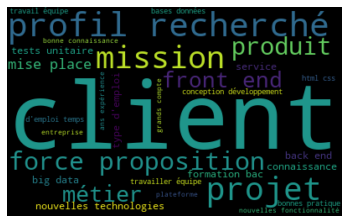

In [267]:
# Create and generate a word cloud image:
wordcloud = WordCloud(width=400, 
                      height=250,
                      max_words = 30, 
                      max_font_size=200,
                      min_font_size = 4,
                      background_color = 'black', 
                      stopwords = STOP_WORDS).generate(desc_txt)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()